In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
tf1 = tf.constant([[10, 20], [30, 40]])
print(tf1)
#(crud)
print(np.square(tf1))
# convert to numPy object
tf1 = tf1 + 100
print(tf1)
# update
tf1_without_2nd_row = tf.gather(tf1, [0])
print(tf1_without_2nd_row)

tf.Tensor(
[[10 20]
 [30 40]], shape=(2, 2), dtype=int32)
[[ 100  400]
 [ 900 1600]]
tf.Tensor(
[[110 120]
 [130 140]], shape=(2, 2), dtype=int32)
tf.Tensor([[110 120]], shape=(1, 2), dtype=int32)


In [ ]:
scalar = tf.constant(10)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
scalar.ndim

0

In [ ]:
vector = tf.constant([19, 11.2])
vector

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([19. , 11.2], dtype=float32)>

In [ ]:
vector.ndim

1

In [ ]:
mat1 = tf.constant([[10, 20],
             [30, 40]])
mat1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 20],
       [30, 40]])>

In [ ]:
mat1.ndim

2

In [ ]:
mat2 = tf.constant([[10., 40.],
                    [30., 20.],
                    [50., 60.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10., 40.],
       [30., 20.],
       [50., 60.]], dtype=float16)>

In [ ]:
mat2.ndim

2

In [ ]:
tensor = tf.constant([[[10, 20, 30,],
                       [40, 50, 60]],
                      [[70, 80, 90],
                       [100, 110, 120]],
                      [[130, 140, 150],
                       [160, 170, 180]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 10,  20,  30],
        [ 40,  50,  60]],

       [[ 70,  80,  90],
        [100, 110, 120]],

       [[130, 140, 150],
        [160, 170, 180]]])>

In [ ]:
tensor.ndim

3

Random tensors

In [ ]:
random_1 = tf.random.Generator.from_seed(70)
random_1 = random_1.normal(shape=(40, 20))
random_2 = tf.random.Generator.from_seed(10)
random_2 = random_2.normal(shape=(50, 30))

DataFrame into TensorFlow

In [ ]:
df2 = pd.DataFrame(np.random.randint(0, 10, (5, 5)), columns=["1", "2", "3", "4", "5"])
print(df2)
print(df2.describe(include='all'))

   1  2  3  4  5
0  2  5  0  2  5
1  6  1  5  8  9
2  5  6  1  3  2
3  2  0  1  3  7
4  4  6  7  6  4
              1         2        3        4         5
count  5.000000  5.000000  5.00000  5.00000  5.000000
mean   3.800000  3.600000  2.80000  4.40000  5.400000
std    1.788854  2.880972  3.03315  2.50998  2.701851
min    2.000000  0.000000  0.00000  2.00000  2.000000
25%    2.000000  1.000000  1.00000  3.00000  4.000000
50%    4.000000  5.000000  1.00000  3.00000  5.000000
75%    5.000000  6.000000  5.00000  6.00000  7.000000
max    6.000000  6.000000  7.00000  8.00000  9.000000


In [ ]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 3, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

   feature1  feature2  feature3  target
0  0.505909  0.905811  0.241889       1
1  0.186832  0.272687  0.996697       2
2  0.259384  0.334580  0.415091       0
3  0.770993  0.029114  0.153532       1
4  0.952453  0.481497  0.177529       2
5  0.151411  0.551008  0.642280       2
6  0.184554  0.916006  0.973663       0
7  0.121226  0.840048  0.078949       1
8  0.733001  0.845125  0.500431       1
9  0.898083  0.198218  0.653549       1
features:[0.5059095  0.905811   0.24188922] target:1
features:[0.18683207 0.2726868  0.996697  ] target:2
features:[0.25938386 0.33458045 0.4150908 ] target:0
features:[0.7709927  0.02911428 0.15353188] target:1
features:[0.95245343 0.4814969  0.1775292 ] target:2
features:[0.15141143 0.5510075  0.6422798 ] target:2
features:[0.18455377 0.9160061  0.9736629 ] target:0
features:[0.12122595 0.84004813 0.07894888] target:1
features:[0.7330005  0.84512544 0.50043094] target:1
features:[0.89808345 0.19821762 0.65354896] target:1


Analyze with Matplotlib

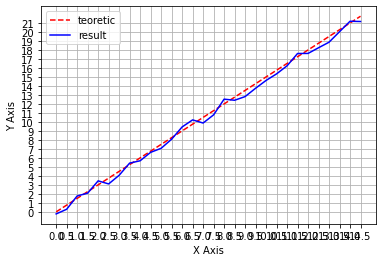

In [ ]:
x = np.arange(0, 15, 0.5)
y1 = x * 1.5

adder = np.random.random(len(x)) * 1.4 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.plot(x, y1, "r--", label="teoretic")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.3960335538198469
0.18102692568923484


In [ ]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('res.csv', 'w') as f:
    f.write(df.to_csv(index=False))

       X          Y  Y_hat
0    0.0  -0.229677   0.00
1    0.5   0.288670   0.75
2    1.0   1.765567   1.50
3    1.5   2.081388   2.25
4    2.0   3.446241   3.00
5    2.5   3.103240   3.75
6    3.0   4.065354   4.50
7    3.5   5.420205   5.25
8    4.0   5.679634   6.00
9    4.5   6.617425   6.75
10   5.0   7.064139   7.50
11   5.5   8.078989   8.25
12   6.0   9.438395   9.00
13   6.5  10.224790   9.75
14   7.0   9.875983  10.50
15   7.5  10.785112  11.25
16   8.0  12.529983  12.00
17   8.5  12.408308  12.75
18   9.0  12.815528  13.50
19   9.5  13.741801  14.25
20  10.0  14.612019  15.00
21  10.5  15.342667  15.75
22  11.0  16.237598  16.50
23  11.5  17.608225  17.25
24  12.0  17.616121  18.00
25  12.5  18.247443  18.75
26  13.0  18.863645  19.50
27  13.5  20.033843  20.25
28  14.0  21.192161  21.00
29  14.5  21.165332  21.75


Regression

In [ ]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 176ms/step - loss: 6.7421 - mae: 6.7421
Epoch 2/80
1/1 [==============================] - 0s 8ms/step - loss: 6.2074 - mae: 6.2074
Epoch 3/80
1/1 [==============================] - 0s 0s/step - loss: 5.6731 - mae: 5.6731
Epoch 4/80
1/1 [==============================] - 0s 0s/step - loss: 5.1387 - mae: 5.1387
Epoch 5/80
1/1 [==============================] - 0s 8ms/step - loss: 4.6044 - mae: 4.6044
Epoch 6/80
1/1 [==============================] - 0s 0s/step - loss: 4.0701 - mae: 4.0701
Epoch 7/80
1/1 [==============================] - 0s 0s/step - loss: 3.5357 - mae: 3.5357
Epoch 8/80
1/1 [==============================] - 0s 8ms/step - loss: 3.0014 - mae: 3.0014
Epoch 9/80
1/1 [==============================] - 0s 0s/step - loss: 2.4671 - mae: 2.4671
Epoch 10/80
1/1 [==============================] - 0s 0s/step - loss: 1.9327 - mae: 1.9327
Epoch 11/80
1/1 [==============================] - 0s 0s/step - loss: 1.3984 - mae: 1.3984
Ep

In [ ]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(30, 0)

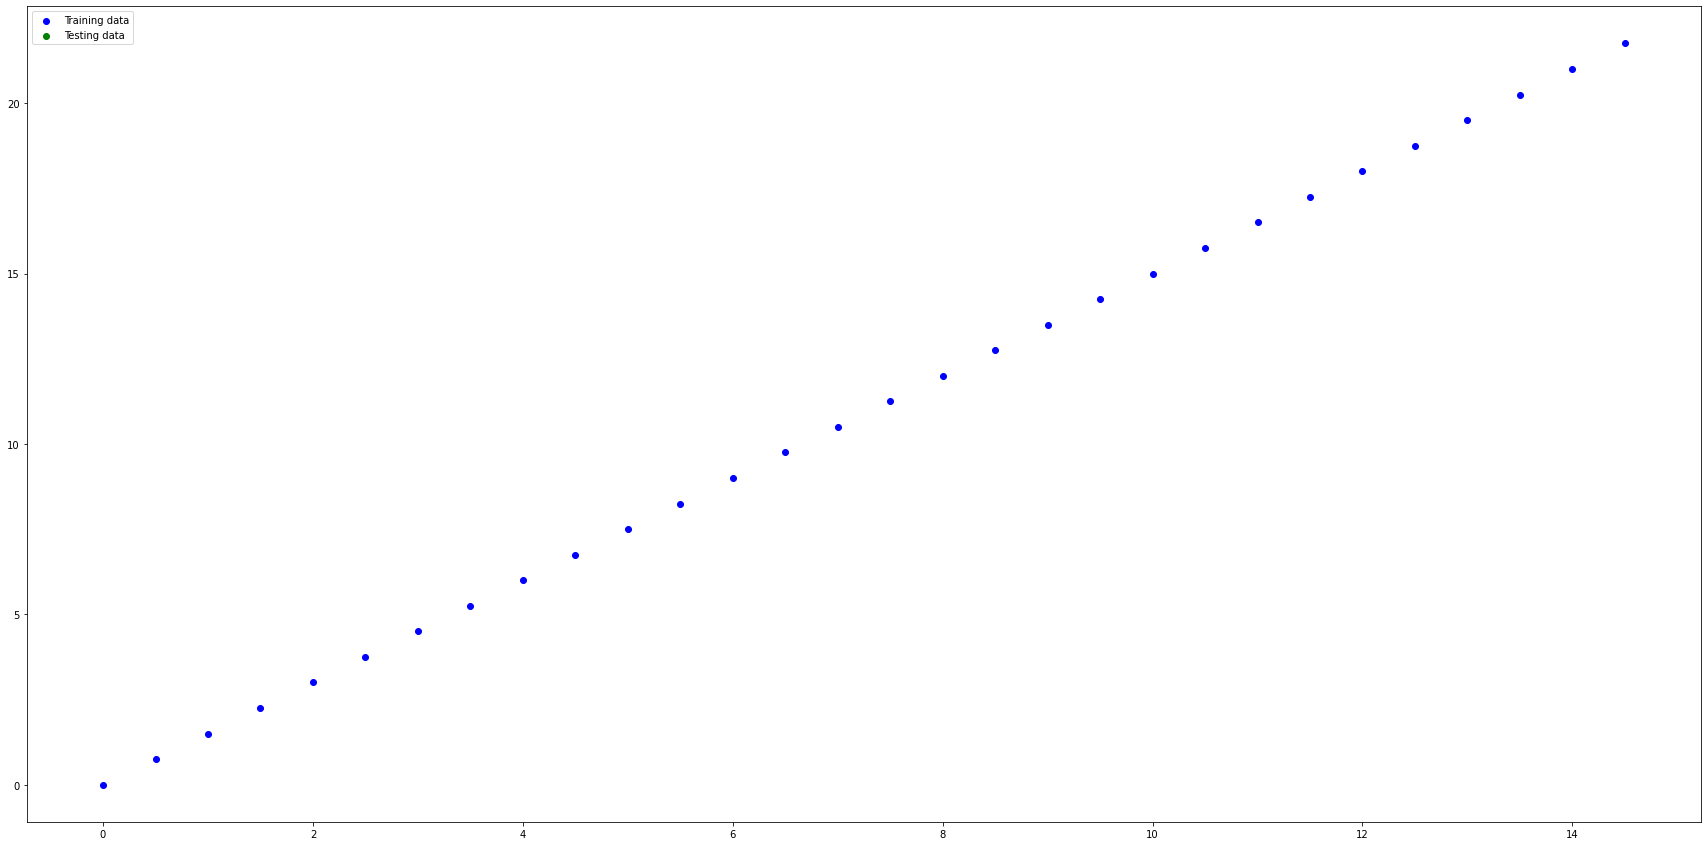

In [ ]:
plt.figure(figsize=(30, 15))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [ ]:
model.predict([20.0])

array([[28.635532]], dtype=float32)

Clasification

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [ ]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
model_1.evaluate(x, y1)

1/1 [==============================] - 0s 128ms/step - loss: 7.2546 - mae: 7.2546


[7.25456428527832, 7.25456428527832]

In [ ]:
len(x)

30

In [ ]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

((30,), (0,))

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

C:\Users\myroslava.ahafonova\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
1/1 [==============================] - 0s 288ms/step - loss: 24.0441 - accuracy: 0.0333
Epoch 2/25
1/1 [==============================] - 0s 0s/step - loss: 22.0634 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 0s/step - loss: 20.1491 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 0s/step - loss: 18.3022 - accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 0s/step - loss: 16.5236 - accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 8ms/step - loss: 14.8142 - accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 0s/step - loss: 13.1743 - accuracy: 0.0000e+00
Epoch 8/25
1/1 [==============================] - 0s 0s/step - loss: 11.6044 - accuracy: 0.0000e+00
Epoch 9/25
1/1 [==============================] - 0s 0s/step - loss: 10.1043 - accuracy: 0.0000e+00
Epoch 10/25
1/1 [==============================] - 0s 0s/step - loss: 8.6738 - accuracy: 0.0000e+00


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,24.044146,0.033333
1,22.063450,0.000000
2,20.149086,0.000000
3,18.302156,0.000000
4,16.523609,0.000000
5,14.814157,0.000000
6,13.174284,0.000000
7,11.604381,0.000000
8,10.104320,0.000000
9,8.673802,0.000000


Text(0.5, 1.0, 'training_2 ')

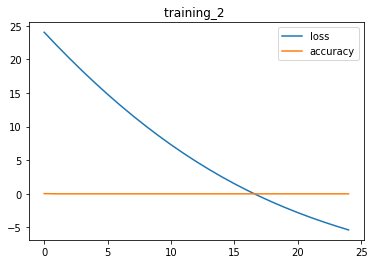

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("training_2 ")